## Undercomplete Autoencoder
Undercomplete Autoencoderはエンコード後のデータの次元数が入力次元よりも小さくなるAutoencoderという．

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
encoding_dim = 32
input_img = Input(shape=(784,))

### ここからネットワークの構築

#### エンコードの設計

In [4]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

Instructions for updating:
Colocations handled automatically by placer.


Denseの第一引数"encoding_dim"は圧縮後の次元（ニューロンの数），第二引数"activation"は活性化関数を指定している．

#### デコードの設計

In [5]:
decoded = Dense(784, activation='sigmoid')(encoded)

Denseの第一引数はエンコード後の次元（ニューロンの数），活性化関数はsigmoid．

#### オートエンコーダの構築

In [6]:
autoencoder = Model(input=input_img, output=decoded)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#### 学習データの準備
今回はfashion mnist

In [10]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#### 実際に学習
エポック50, バッチサイズ256

In [11]:
autoencoder.fit(x_train, x_train, nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.5275 - val_loss: 0.4584
Epoch 2/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.4256 - val_loss: 0.4065
Epoch 3/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.3959 - val_loss: 0.3884
Epoch 4/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.3791 - val_loss: 0.3732
Epoch 5/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.3651 - val_loss: 0.3607
Epoch 6/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.3537 - val_loss: 0.3505
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.3443 - val_loss: 0.3422
Epoch 8/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.3369 - val_loss: 0.3357
Epoch 9/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.3311 - val_loss: 0.3306
Epoch

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
decoded_imgs = autoencoder.predict(x_test)

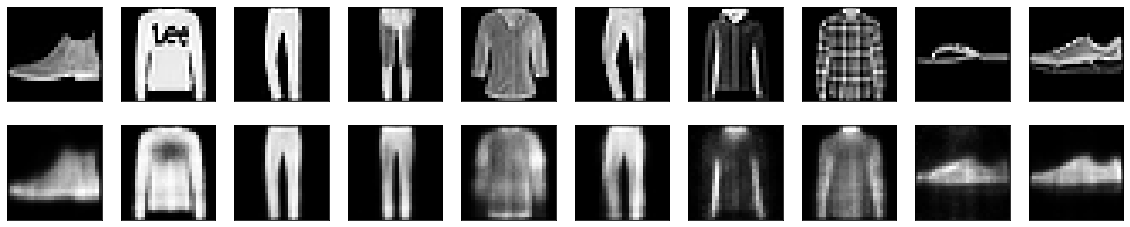

In [14]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()